# **스마트폰 센서 데이터 기반 모션 분류**
# 단계 3: 단계별 모델링

## 환경설정

* 구글 드라이브 바로 밑에 새 폴더를 만들고 데이터 파일 넣기

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/miniproject1/'

In [ ]:
# 라이브러리 로딩
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='train_err', marker='.')
    plt.plot(history.history['val_loss'], label='val_err', marker='.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

In [ ]:
# 데이터 로딩
df_train = pd.read_csv(path + 'data01_train.csv')
df_test = pd.read_csv(path + 'data01_test.csv')
df_features = pd.read_csv(path + 'features.csv')

In [ ]:
# 불필요한 컬럼 제거
df_train.drop('subject', axis=1, inplace=True)
df_test.drop('subject', axis=1, inplace=True)

### EDA

In [ ]:
# 전체 데이터 크기 확인
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (5881, 562)
Test shape: (1471, 562)


In [ ]:
# 전체 데이터 상위 5개 행 확인
print("Train head:")
display(df_train.head())
print("\nTest head:")
display(df_test.head())

Train head:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.487737,-0.816696,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,STANDING
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.237820,-0.693515,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,LAYING
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,-0.535287,-0.829311,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,STANDING
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.004012,-0.408956,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,WALKING
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.157832,-0.563437,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,WALKING_DOWNSTAIRS



Test head:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.284379,-0.021981,-0.116683,-0.992490,-0.979640,-0.963321,-0.992563,-0.977304,-0.958142,-0.938850,...,-0.509523,-0.850065,-0.018043,0.092304,0.074220,-0.714534,-0.671943,-0.018351,-0.185733,SITTING
1,0.277440,-0.028086,-0.118412,-0.996620,-0.927676,-0.972294,-0.997346,-0.931405,-0.971788,-0.939837,...,-0.210792,-0.613367,-0.022456,-0.155414,0.247498,-0.112257,-0.826816,0.184489,-0.068699,STANDING
2,0.305833,-0.041023,-0.087303,0.006880,0.182800,-0.237984,0.005642,0.028616,-0.236474,0.016311,...,0.579587,0.394388,-0.362616,0.171069,0.576349,-0.688314,-0.743234,0.272186,0.053101,WALKING
3,0.276053,-0.016487,-0.108381,-0.995379,-0.983978,-0.975854,-0.995877,-0.985280,-0.974907,-0.941425,...,-0.566291,-0.841455,0.289548,0.079801,-0.020033,0.291898,-0.639435,-0.111998,-0.123298,SITTING
4,0.271998,0.016904,-0.078856,-0.973468,-0.702462,-0.869450,-0.979810,-0.711601,-0.856807,-0.920760,...,0.447577,0.214219,0.010111,0.114179,-0.830776,-0.325098,-0.840817,0.116237,-0.096615,STANDING


In [ ]:
# 전체 데이터 구조 요약 정보 확인
print("Train info:")
print(df_train.info())
print("\nTest info:")
print(df_test.info())

Train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 25.2+ MB
None

Test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1471 entries, 0 to 1470
Columns: 562 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), object(1)
memory usage: 6.3+ MB
None


In [ ]:
# 수치형 변수 분포 확인
print("Train numerical summary:")
display(df_train.describe())
print("\nTest numerical summary:")
display(df_test.describe())

Train numerical summary:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,...,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000,5881.000000
mean,0.274811,-0.017799,-0.109396,-0.603138,-0.509815,-0.604058,-0.628151,-0.525944,-0.605374,-0.465490,...,0.126955,-0.305883,-0.623548,0.008524,-0.001185,0.009340,-0.007099,-0.491501,0.059299,-0.054594
std,0.067614,0.039422,0.058373,0.448807,0.501815,0.417319,0.424345,0.485115,0.413043,0.544995,...,0.249176,0.322808,0.310371,0.339730,0.447197,0.608190,0.476738,0.509069,0.297340,0.278479
min,-0.503823,-0.684893,-1.000000,-1.000000,-0.999844,-0.999667,-1.000000,-0.999419,-1.000000,-1.000000,...,-0.965725,-0.979261,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.980143
25%,0.262919,-0.024877,-0.121051,-0.992774,-0.977680,-0.980127,-0.993602,-0.977865,-0.980112,-0.936067,...,-0.021610,-0.541969,-0.845985,-0.122361,-0.294369,-0.481718,-0.373345,-0.811397,-0.018203,-0.141555
50%,0.277154,-0.017221,-0.108781,-0.943933,-0.844575,-0.856352,-0.948501,-0.849266,-0.849896,-0.878729,...,0.133887,-0.342923,-0.712677,0.010278,0.005146,0.011448,-0.000847,-0.709441,0.182893,0.003951
75%,0.288526,-0.010920,-0.098163,-0.242130,-0.034499,-0.262690,-0.291138,-0.068857,-0.268539,-0.013690,...,0.288944,-0.127371,-0.501158,0.154985,0.285030,0.499857,0.356236,-0.511330,0.248435,0.111932
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,0.977344,0.478157,1.000000



Test numerical summary:


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,...,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000,1471.000000
mean,0.273198,-0.017281,-0.108123,-0.614634,-0.515427,-0.607533,-0.639950,-0.530760,-0.609256,-0.481055,...,0.118651,-0.311513,-0.632273,0.009324,0.015666,0.006272,-0.001510,-0.481737,0.055771,-0.064194
std,0.079989,0.045957,0.049082,0.448480,0.506094,0.424243,0.422994,0.489381,0.418536,0.542756,...,0.258112,0.313792,0.296179,0.324864,0.452616,0.608954,0.483028,0.522714,0.298124,0.281645
min,-1.000000,-1.000000,-0.418354,-0.999717,-0.999873,-1.000000,-0.999867,-1.000000,-0.999879,-0.948723,...,-1.000000,-0.995357,-0.994664,-0.937468,-0.990492,-0.995222,-0.969066,-0.999380,-0.995073,-1.000000
25%,0.263787,-0.024792,-0.120733,-0.992669,-0.979082,-0.981070,-0.993498,-0.979214,-0.980659,-0.936791,...,-0.035193,-0.546342,-0.844547,-0.119166,-0.265533,-0.485998,-0.380300,-0.814060,-0.017413,-0.148445
50%,0.277322,-0.017187,-0.108124,-0.952426,-0.867309,-0.869890,-0.958705,-0.873891,-0.863451,-0.890491,...,0.135282,-0.347433,-0.706699,0.005049,0.023421,-0.005036,0.002408,-0.708911,0.178814,-0.002243
75%,0.288058,-0.010238,-0.096606,-0.245405,-0.030639,-0.260223,-0.297260,-0.058824,-0.256657,-0.030692,...,0.289832,-0.125796,-0.516910,0.135698,0.312690,0.518184,0.374583,-0.486534,0.248126,0.096674
max,0.631510,0.359587,0.543939,0.899922,0.782590,0.931308,0.950758,0.602458,0.784041,0.821218,...,0.860512,0.941113,0.894210,0.980889,0.991899,0.994366,0.979522,1.000000,0.432496,0.992766


* target 단변량 분석

In [ ]:
# target 변수의 클래스 분포 확인(개수 기준)
print("Train Activity label counts:")
print(df_train['Activity'].value_counts())
print("\nTest Activity label counts:")
print(df_test['Activity'].value_counts())

Train Activity label counts:
Activity
LAYING                1115
STANDING              1087
SITTING               1032
WALKING                998
WALKING_UPSTAIRS       858
WALKING_DOWNSTAIRS     791
Name: count, dtype: int64

Test Activity label counts:
Activity
LAYING                292
STANDING              287
SITTING               254
WALKING               228
WALKING_UPSTAIRS      215
WALKING_DOWNSTAIRS    195
Name: count, dtype: int64


In [ ]:
# target 변수의 클래스 분포 확인(비율 기준)
print("Train Activity label proportion:")
print(df_train['Activity'].value_counts(normalize=True))
print("\nTest Activity label proportion:")
print(df_test['Activity'].value_counts(normalize=True))

Train Activity label proportion:
Activity
LAYING                0.189594
STANDING              0.184833
SITTING               0.175480
WALKING               0.169699
WALKING_UPSTAIRS      0.145894
WALKING_DOWNSTAIRS    0.134501
Name: proportion, dtype: float64

Test Activity label proportion:
Activity
LAYING                0.198504
STANDING              0.195105
SITTING               0.172672
WALKING               0.154997
WALKING_UPSTAIRS      0.146159
WALKING_DOWNSTAIRS    0.132563
Name: proportion, dtype: float64


## 데이터 전처리

### 1단계 모델링을 위한 레이블

In [ ]:
# 정적(0) / 동적(1) 레이블 생성
df_train['is_dynamic'] = df_train['Activity'].apply(lambda x: 0 if x in ['STANDING', 'SITTING', 'LAYING'] else 1)
df_test['is_dynamic'] = df_test['Activity'].apply(lambda x: 0 if x in ['STANDING', 'SITTING', 'LAYING'] else 1)

### X, y 분리

In [ ]:
X = df_train.drop(['is_dynamic', 'Activity'], axis=1)
y = df_train['is_dynamic']  # 1단계 target

X_test = df_test.drop(['is_dynamic', 'Activity'], axis=1)
y_test = df_test['is_dynamic']  # 1단계 target

### 스케일링

💭 (둘 중 하나를 선택합니다 !)

In [ ]:
# StandardScaler(표준화)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# MinMaxScaler(정규화)
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### train/validation 분할

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y,
                                                  test_size=0.2,
                                                  random_state=42)

## **미션 4: 단계별 모델링**

### 1단계 이진 분류
* 정적/동적 행동 분류 모델

In [ ]:
# 1단계: 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2단계: 선언하기
model = RandomForestClassifier(random_state=42)

# 3단계: 학습하기
model.fit(X_train, y_train)

# 4단계: 예측하기
y_pred = model.predict(X_val)

# 5단계: 평가하기
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


### 2단계 다중 분류
* 정적 행동 세부 분류 모델
* 동적 행동 세부 분류 모델

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

**정적 행동 세부 분류**

In [ ]:
# 정적(0) 행동 데이터 추출
df_static_train = df_train[df_train['is_dynamic'] == 0].copy()
df_static_test = df_test[df_test['is_dynamic'] == 0].copy()

In [ ]:
# target 인코딩
label_mapping = {'LAYING': 0, 'SITTING': 1, 'STANDING': 2}
df_static_train['Activity'] = df_static_train['Activity'].map(label_mapping)
df_static_test['Activity'] = df_static_test['Activity'].map(label_mapping)

In [ ]:
# X, y 분리
X_static_train = df_static_train.drop(['is_dynamic', 'Activity'], axis=1)
y_static_train = df_static_train['Activity']
X_static_test = df_static_test.drop(['is_dynamic', 'Activity'], axis=1)
y_static_test = df_static_test['Activity']

In [ ]:
# StandardScaler(표준화)
scaler = StandardScaler()
X_static_train_scaled = scaler.fit_transform(X_static_train)
X_static_test_scaled = scaler.transform(X_static_test)

# MinMaxScaler(정규화)
# scaler = MinMaxScaler()
# X_static_train_scaled = scaler.fit_transform(X_static_train)
# X_static_test_scaled = scaler.transform(X_static_test)

In [ ]:
# train/validation 분할
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_static_train_scaled, y_static_train,
                                                          test_size=0.2,
                                                          random_state=42)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5704 - loss: 0.9086 - val_accuracy: 0.8949 - val_loss: 0.2962
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8805 - loss: 0.3013 - val_accuracy: 0.9366 - val_loss: 0.2048
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9264 - loss: 0.1857 - val_accuracy: 0.9660 - val_loss: 0.1181
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9537 - loss: 0.1248 - val_accuracy: 0.9490 - val_loss: 0.1255
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9549 - loss: 0.1035 - val_accuracy: 0.9691 - val_loss: 0.1317
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9702 - loss: 0.0908 - val_accuracy: 0.9675 - val_loss: 0.0999
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9724 - loss: 0.0701 - val_accuracy: 0.9706 - val_loss: 0.1035
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9814 - loss: 0.0618 - val_accuracy: 0.9753 - val_loss:

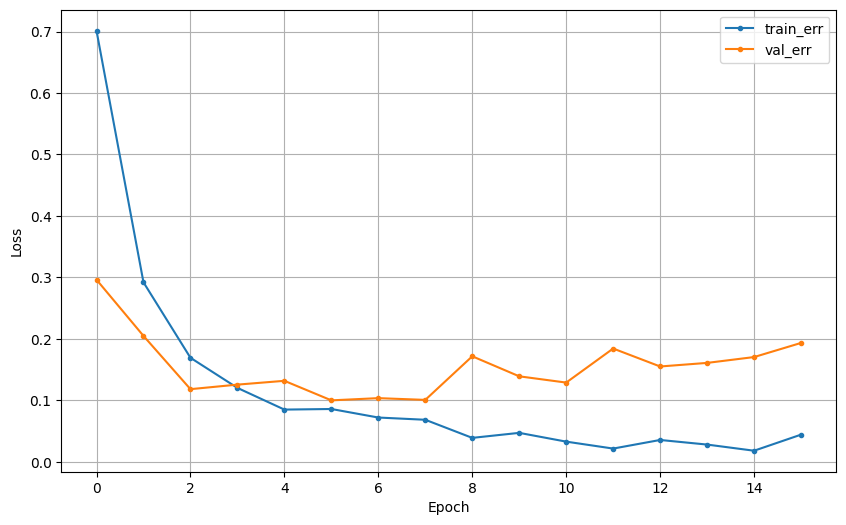

In [ ]:
# 모델 1: 은닉층 5개 + Epoch 20 + 학습률 0.001 + Early Stopping
def build_deep_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(256, activation='relu'),  # 은닉층 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # 은닉층 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # 은닉층 3
        Dense(64, activation='relu'),  # 은닉층 4
        Dense(32, activation='relu'),  # 은닉층 5
        Dense(output_dim, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 학습
deep_model = build_deep_model(X_train_s.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = deep_model.fit(X_train_s, y_train_s,
                         validation_data=(X_val_s, y_val_s),
                         epochs=20,
                         batch_size=64,
                         verbose=1,
                         callbacks=[early_stopping])

# 학습곡선
dl_history_plot(history)

In [ ]:
# 평가
_, val_accuracy = deep_model.evaluate(X_val_s, y_val_s)
print(f"Validation Accuracy: {val_accuracy:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9681 - loss: 0.0977 
Validation Accuracy: 0.9675


Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6114 - loss: 0.8805 - val_accuracy: 0.9057 - val_loss: 0.3254
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9291 - loss: 0.2327 - val_accuracy: 0.9413 - val_loss: 0.1749
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9694 - loss: 0.1056 - val_accuracy: 0.9552 - val_loss: 0.1180
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9827 - loss: 0.0642 - val_accuracy: 0.9536 - val_loss: 0.1523
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9890 - loss: 0.0476 - val_accuracy: 0.9583 - val_loss: 0.1082
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9902 - loss: 0.0386 - val_accuracy: 0.9598 - val_loss: 0.1051
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9975 - loss: 0.0233 - val_accuracy: 0.9722 - val_loss: 0.0978
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9980 - loss: 0.0179 - val_accuracy: 0.9737 - val_loss

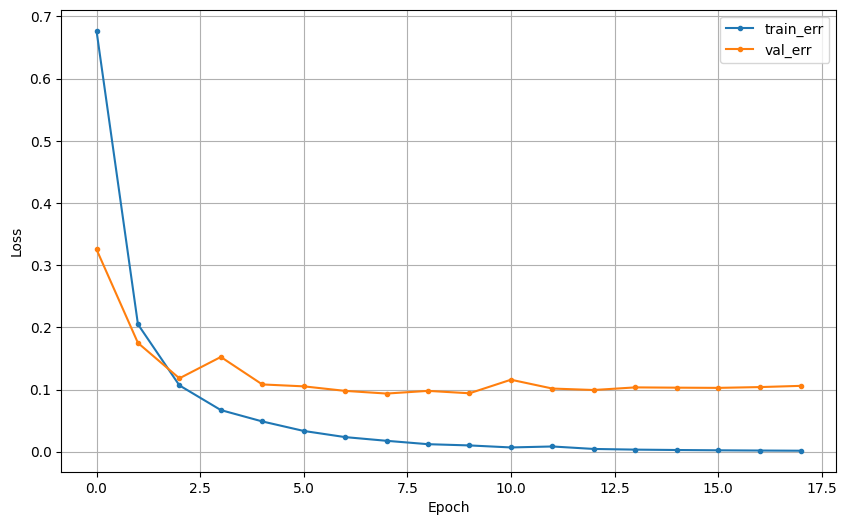

In [ ]:
# 모델 2: 은닉층 3개 + Epoch 30 + 학습률 0.0005 + Early Stopping
def build_lowlr_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(128, activation='relu'),  # 은닉층 1
        Dense(64, activation='relu'),  # 은닉층 2
        Dense(32, activation='relu'),  # 은닉층 3
        Dense(output_dim, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),  # 낮은 학습률
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 학습
lowlr_model = build_lowlr_model(X_train_s.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = lowlr_model.fit(X_train_s, y_train_s,
                          validation_data=(X_val_s, y_val_s),
                          epochs=30,
                          batch_size=64,
                          verbose=1,
                          callbacks=[early_stopping])

# 학습곡선
dl_history_plot(history)

In [ ]:
# 평가
_, val_accuracy = lowlr_model.evaluate(X_val_s, y_val_s)
print(f"Validation Accuracy: {val_accuracy:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9776 - loss: 0.0864 
Validation Accuracy: 0.9737


Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4835 - loss: 1.0002 - val_accuracy: 0.8733 - val_loss: 0.3695
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8288 - loss: 0.3998 - val_accuracy: 0.9397 - val_loss: 0.1735
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9212 - loss: 0.2104 - val_accuracy: 0.9428 - val_loss: 0.1578
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9391 - loss: 0.1556 - val_accuracy: 0.9614 - val_loss: 0.1139
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9490 - loss: 0.1275 - val_accuracy: 0.9598 - val_loss: 0.1192
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9640 - loss: 0.1001 - val_accuracy: 0.9598 - val_loss: 0.1195
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9615 - loss: 0.0975 - val_accuracy: 0.9629 - val_loss: 0.1073
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9700 - loss: 0.0775 - val_accuracy: 0.9660 - val_

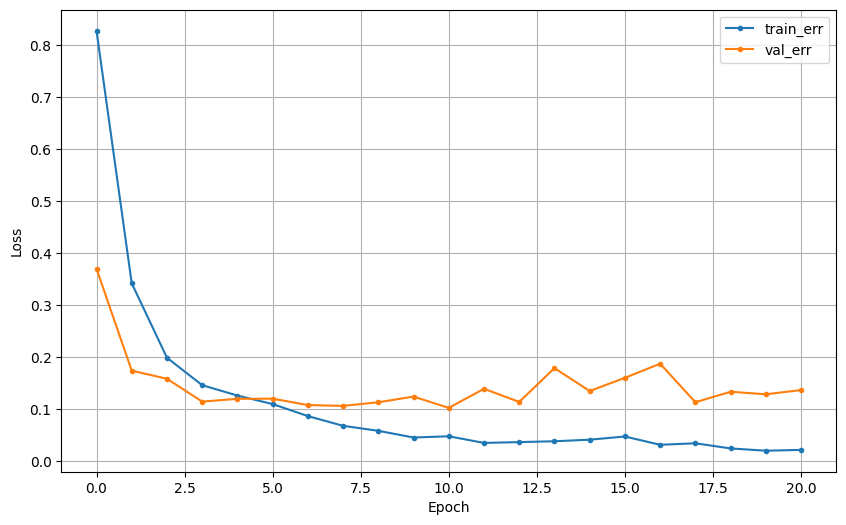

In [ ]:
# 모델 3: 은닉층 5개 + Epoch 30 + 학습률 0.0005 + Early Stopping
def build_tuned_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(256, activation='relu'),  # 은닉층 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # 은닉층 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # 은닉층 3
        Dense(64, activation='relu'),  # 은닉층 4
        Dense(32, activation='relu'),  # 은닉층 5
        Dense(output_dim, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 학습
tuned_model = build_tuned_model(X_train_s.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = tuned_model.fit(X_train_s, y_train_s,
                          validation_data=(X_val_s, y_val_s),
                          epochs=30,
                          batch_size=64,
                          verbose=1,
                          callbacks=[early_stopping])

# 학습곡선
dl_history_plot(history)

In [ ]:
# 평가
_, val_accuracy = tuned_model.evaluate(X_val_s, y_val_s)
print(f"Validation Accuracy: {val_accuracy:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9754 - loss: 0.0884 
Validation Accuracy: 0.9737


**동적 행동 세부 분류**

In [ ]:
# 동적(1) 행동 데이터 추출
df_dynamic_train = df_train[df_train['is_dynamic'] == 1].copy()
df_dynamic_test = df_test[df_test['is_dynamic'] == 1].copy()

In [ ]:
# target 인코딩
label_mapping = {'WALKING': 0, 'WALKING_UPSTAIRS': 1, 'WALKING_DOWNSTAIRS': 2}
df_dynamic_train['Activity'] = df_dynamic_train['Activity'].map(label_mapping)
df_dynamic_test['Activity'] = df_dynamic_test['Activity'].map(label_mapping)

In [ ]:
# X, y 분리
X_dynamic_train = df_dynamic_train.drop(['is_dynamic', 'Activity'], axis=1)
y_dynamic_train = df_dynamic_train['Activity']
X_dynamic_test = df_dynamic_test.drop(['is_dynamic', 'Activity'], axis=1)
y_dynamic_test = df_dynamic_test['Activity']

In [ ]:
# StandardScaler(표준화)
scaler = StandardScaler()
X_dynamic_train_scaled = scaler.fit_transform(X_dynamic_train)
X_dynamic_test_scaled = scaler.transform(X_dynamic_test)

# MinMaxScaler(정규화)
# scaler = MinMaxScaler()
# X_dynamic_train_scaled = scaler.fit_transform(X_dynamic_train)
# X_dynamic_test_scaled = scaler.transform(X_dynamic_test)

In [ ]:
# train/validation 분할
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_dynamic_train_scaled, y_dynamic_train,
                                                          test_size=0.2,
                                                          random_state=42)

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6687 - loss: 0.7627 - val_accuracy: 0.9509 - val_loss: 0.1288
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9744 - loss: 0.0740 - val_accuracy: 0.9868 - val_loss: 0.0305
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9892 - loss: 0.0319 - val_accuracy: 0.9887 - val_loss: 0.0258
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9937 - loss: 0.0305 - val_accuracy: 0.9868 - val_loss: 0.0190
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9866 - loss: 0.0503 - val_accuracy: 0.9717 - val_loss: 0.1024
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9835 - loss: 0.0510 - val_accuracy: 0.9962 - val_loss: 0.0148
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9969 - loss: 0.0103 - val_accuracy: 0.9962 - val_loss: 0.0138
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9980 - loss: 0.0045 - val_accuracy: 0.9962 - val_loss:

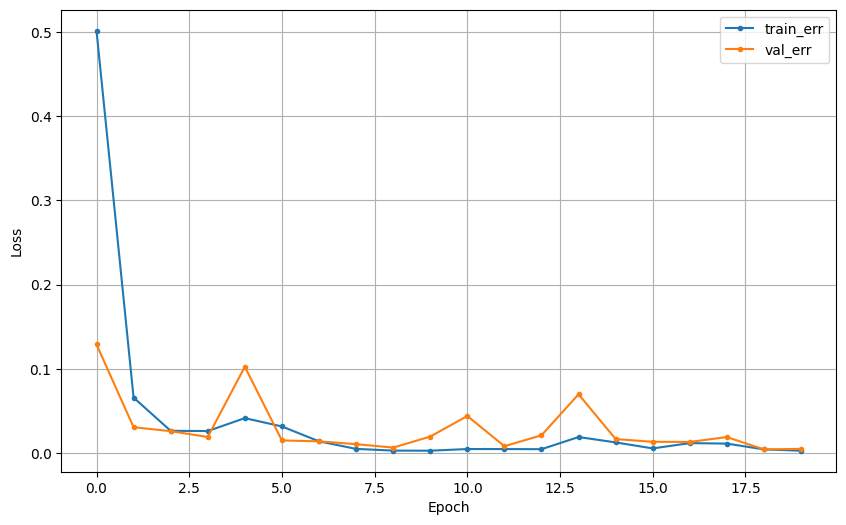

In [ ]:
# 모델 1: 은닉층 5개 + Epoch 20 + 학습률 0.001 + Early Stopping
def build_deep_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(256, activation='relu'),  # 은닉층 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # 은닉층 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # 은닉층 3
        Dense(64, activation='relu'),  # 은닉층 4
        Dense(32, activation='relu'),  # 은닉층 5
        Dense(output_dim, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 학습
deep_model = build_deep_model(X_train_d.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = deep_model.fit(X_train_d, y_train_d,
                         validation_data=(X_val_d, y_val_d),
                         epochs=20,
                         batch_size=64,
                         verbose=1,
                         callbacks=[early_stopping])

# 학습곡선
dl_history_plot(history)

In [ ]:
# 평가
_, val_accuracy = deep_model.evaluate(X_val_d, y_val_d)
print(f"Validation Accuracy: {val_accuracy:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0040     
Validation Accuracy: 0.9981


Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6900 - loss: 0.7504 - val_accuracy: 0.9377 - val_loss: 0.1819
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9756 - loss: 0.0941 - val_accuracy: 0.9887 - val_loss: 0.0623
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9909 - loss: 0.0394 - val_accuracy: 0.9906 - val_loss: 0.0440
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9995 - loss: 0.0121 - val_accuracy: 0.9925 - val_loss: 0.0314
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9925 - val_loss: 0.0257
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9925 - val_loss: 0.0225
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9925 - val_loss: 0.0207
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9925 - val_loss:

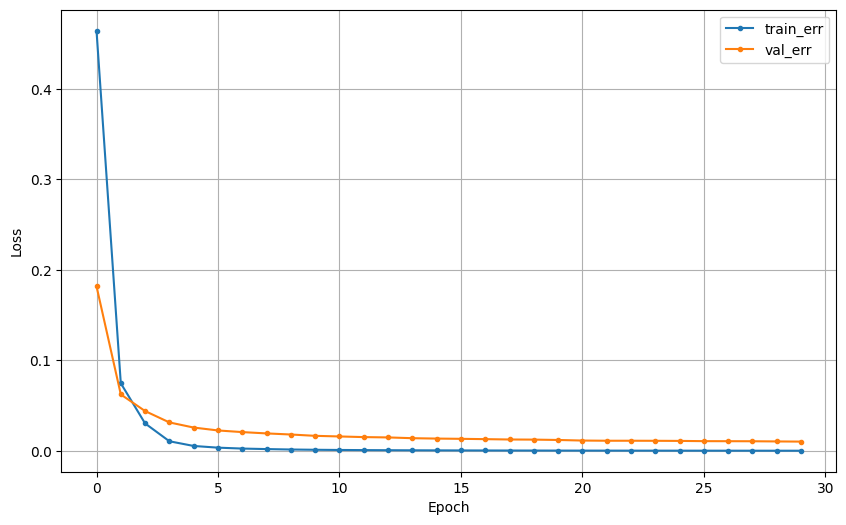

In [ ]:
# 모델 2: 은닉층 3개 + Epoch 30 + 학습률 0.0005 + Early Stopping
def build_lowlr_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(128, activation='relu'),  # 은닉층 1
        Dense(64, activation='relu'),  # 은닉층 2
        Dense(32, activation='relu'),  # 은닉층 3
        Dense(output_dim, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),  # 낮은 학습률
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 학습
lowlr_model = build_lowlr_model(X_train_d.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = lowlr_model.fit(X_train_d, y_train_d,
                          validation_data=(X_val_d, y_val_d),
                          epochs=30,
                          batch_size=64,
                          verbose=1,
                          callbacks=[early_stopping])

# 학습곡선
dl_history_plot(history)

In [ ]:
# 평가
_, val_accuracy = lowlr_model.evaluate(X_val_d, y_val_d)
print(f"Validation Accuracy: {val_accuracy:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9932 - loss: 0.0069     
Validation Accuracy: 0.9925


Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6281 - loss: 0.8082 - val_accuracy: 0.9453 - val_loss: 0.1609
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9608 - loss: 0.1181 - val_accuracy: 0.9774 - val_loss: 0.0667
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9866 - loss: 0.0510 - val_accuracy: 0.9868 - val_loss: 0.0285
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9925 - loss: 0.0234 - val_accuracy: 0.9906 - val_loss: 0.0248
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9922 - loss: 0.0227 - val_accuracy: 0.9906 - val_loss: 0.0267
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9911 - loss: 0.0244 - val_accuracy: 0.9887 - val_loss: 0.0265
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9958 - loss: 0.0117 - val_accuracy: 0.9925 - val_loss: 0.0163
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9984 - loss: 0.0094 - val_accuracy: 0.9943 - val_loss:

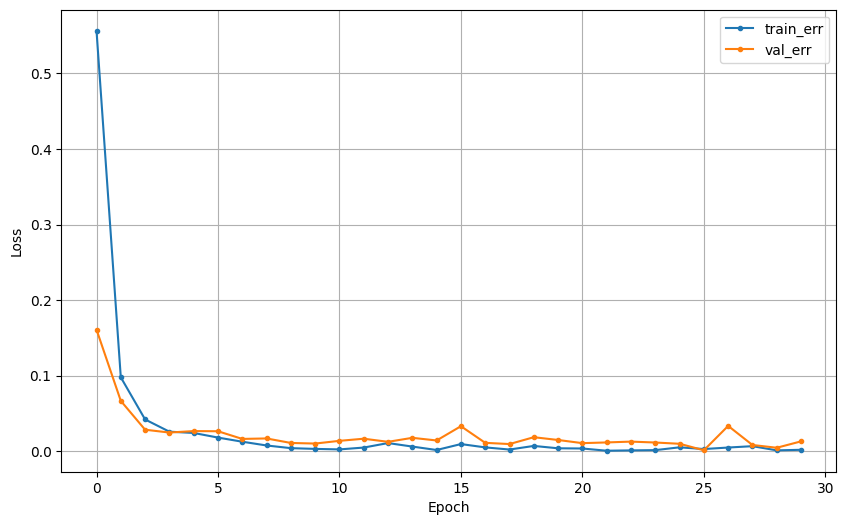

In [ ]:
# 모델 3: 은닉층 5개 + Epoch 30 + 학습률 0.0005 + Early Stopping
def build_tuned_model(input_dim, output_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(256, activation='relu'),  # 은닉층 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # 은닉층 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # 은닉층 3
        Dense(64, activation='relu'),  # 은닉층 4
        Dense(32, activation='relu'),  # 은닉층 5
        Dense(output_dim, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 학습
tuned_model = build_tuned_model(X_train_d.shape[1], 3)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = tuned_model.fit(X_train_d, y_train_d,
                          validation_data=(X_val_d, y_val_d),
                          epochs=30,
                          batch_size=64,
                          verbose=1,
                          callbacks=[early_stopping])

# 학습곡선
dl_history_plot(history)

In [ ]:
# 평가
_, val_accuracy = tuned_model.evaluate(X_val_d, y_val_d)
print(f"Validation Accuracy: {val_accuracy:.4f}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0017 
Validation Accuracy: 1.0000


## 분류 모델 파이프라인
* 1단계, 2단계 모델 통합

![](https://github.com/DA4BAM/image/blob/main/pipeline%20function.png?raw=true)

In [ ]:
# (tip) 함수 만들기
# 1. 전처리
# 1-1. 스케일링
# 1-2. 입력값 만들기
# ----------------------
# 2. 예측하기
# 2-1. 단계 1 모델로 0, 1 구분
# 2-2. 단계 1 결과로 데이터 나누기
# 2-3. 단계 2 모델로 예측
# 2-4. 예측 결과 원래 값으로 변환
# 2-5. 하나로 합쳐보기
# ----------------------
# 3. 최종 성능 평가

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# 전처리
def preprocess_data_binary_multi(df, fit=False, scaler=None, binary_encoder=None, multi_encoder=None):
    """
    전처리 함수: 이진 분류용 + 다중 분류용 타겟 생성, 스케일링

    Parameters:
    - df: 입력 DataFrame (Activity 포함)
    - fit: True면 scaler 및 encoder 학습
    - scaler, binary_encoder, multi_encoder: 재사용 가능 객체

    Returns:
    - X_scaled: 스케일링된 feature
    - y_binary: 정적(0)/동적(1) 이진 분류용 타겟 (np.array)
    - y_multi_encoded: 다중 클래스 정수 인코딩된 타겟
    - scaler, binary_encoder, multi_encoder: 학습된 객체 반환
    """
    df = df.copy()

    # 이진 분류 타겟 생성
    y_binary = df['Activity'].apply(lambda x: 0 if x in ['STANDING', 'SITTING', 'LAYING'] else 1).values

    # 다중 분류용 라벨
    if multi_encoder is None:
        multi_encoder = LabelEncoder()
    if fit:
        y_multi_encoded = multi_encoder.fit_transform(df['Activity'])
    else:
        y_multi_encoded = multi_encoder.transform(df['Activity'])

    # X 구성 (Activity 제거)
    X = df.drop(columns=['Activity'])

    # 스케일링
    if scaler is None:
        scaler = StandardScaler()
    if fit:
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = scaler.transform(X)

    return X_scaled, y_binary, y_multi_encoded, scaler, multi_encoder


In [ ]:
# 1단계 모델
def build_stage1_model():
    model = RandomForestClassifier(random_state=42)
    return model

In [ ]:
# 2단계 정적 분류 모델
def build_static_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(128, activation='relu'),  # 은닉층 1
        Dense(64, activation='relu'),  # 은닉층 2
        Dense(32, activation='relu'),  # 은닉층 3
        Dense(3, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),  # 낮은 학습률
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# 2단계 동적 분류 모델
def build_dynamic_model(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),  # 입력층
        Dense(256, activation='relu'),  # 은닉층 1
        Dropout(0.3),
        Dense(128, activation='relu'),  # 은닉층 2
        Dropout(0.3),
        Dense(64, activation='relu'),  # 은닉층 3
        Dense(64, activation='relu'),  # 은닉층 4
        Dense(32, activation='relu'),  # 은닉층 5
        Dense(3, activation='softmax')  # 출력층
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
# 최종 모델
def final_motion_classifier_v2(X_test_scaled, y_test_multi, model_stage1, model_static, model_dynamic):
    """
    최종 분류 파이프라인:
    - 1단계: 정적/동적 예측 (model_stage1: RandomForest)
    - 2단계: 정적이면 model_static (DNN), 동적이면 model_dynamic (DNN)
    - 3단계: 결과 통합 + 평가 출력

    Parameters:
    - X_test_scaled: 스케일된 입력
    - y_test_multi: 다중 분류용 정답 레이블 (0~5)
    - model_stage1: 이진 분류 모델 (0: 정적, 1: 동적)
    - model_static: 정적 행동 분류 모델 (0~2)
    - model_dynamic: 동적 행동 분류 모델 (0~2, 결과는 +3 해야함)

    Returns:
    - y_pred: 최종 예측 레이블 (0~5)
    - accuracy: 정확도
    - report: classification_report 문자열
    """
    # 1단계: 정적/동적 분류
    is_dynamic_pred = model_stage1.predict(X_test_scaled)

    # 인덱스 분리
    static_idx = np.where(is_dynamic_pred == 0)[0]
    dynamic_idx = np.where(is_dynamic_pred == 1)[0]

    # 결과 배열 초기화
    y_pred = np.empty(len(X_test_scaled), dtype=int)

    # 2단계: 정적 예측
    if len(static_idx) > 0:
        y_pred[static_idx] = model_static.predict(X_test_scaled[static_idx]).argmax(axis=1)  # 0~2

    # 2단계: 동적 예측
    if len(dynamic_idx) > 0:
        y_pred[dynamic_idx] = model_dynamic.predict(X_test_scaled[dynamic_idx]).argmax(axis=1) + 3  # 3~5

    # 3단계: 평가
    accuracy = accuracy_score(y_test_multi, y_pred)
    report = classification_report(
        y_test_multi,
        y_pred,
        target_names=[
            'LAYING', 'SITTING', 'STANDING',
            'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'
        ]
    )

    print(f"\n✅ 최종 정확도: {accuracy:.4f}")
    print("\n📊 분류 리포트:")
    print(report)

    return y_pred, accuracy, report

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/miniproject1/'

# 데이터 로딩
df_train = pd.read_csv(path + 'data01_train.csv')
df_test = pd.read_csv(path + 'data01_test.csv')
df_features = pd.read_csv(path + 'features.csv')

# 불필요한 컬럼 제거
df_train.drop('subject', axis=1, inplace=True)
df_test.drop('subject', axis=1, inplace=True)

Mounted at /content/drive


In [ ]:
# 학습용 데이터 전처리
X_train_scaled, y_train_binary, y_train_multi, scaler, multi_encoder = preprocess_data_binary_multi(df_train, fit=True)

# 테스트 데이터 전처리
X_test_scaled, y_test_binary, y_test_multi, _, _ = preprocess_data_binary_multi(
    df_test, fit=False, scaler=scaler, multi_encoder=multi_encoder
)

# 학습용 데이터 분할
static_idx = np.where(y_train_binary == 0)[0]
dynamic_idx = np.where(y_train_binary == 1)[0]
X_static, y_static = X_train_scaled[static_idx], y_train_multi[static_idx]
X_dynamic, y_dynamic = X_train_scaled[dynamic_idx], y_train_multi[dynamic_idx] - 3

# 모델 학습
model_stage1 = build_stage1_model()
model_stage1.fit(X_train_scaled, y_train_binary)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_static = build_static_model(X_static.shape[1])
model_static.fit(X_static, y_static, epochs=30, batch_size=64, verbose=1, callbacks=[early_stopping])

model_dynamic = build_dynamic_model(X_dynamic.shape[1])
model_dynamic.fit(X_dynamic, y_dynamic, epochs=30, batch_size=64, verbose=1, callbacks=[early_stopping])

# 예측 및 평가
y_pred, acc, report = final_motion_classifier_v2(X_test_scaled, y_test_multi, model_stage1, model_static, model_dynamic)

Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6473 - loss: 0.8115
Epoch 2/30
44/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9190 - loss: 0.2182

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9208 - loss: 0.2138
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9267 - loss: 0.1833
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9617 - loss: 0.0960
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9724 - loss: 0.0813
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9750 - loss: 0.0733
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9813 - loss: 0.0600
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9802 - loss: 0.0551
Epoch 9/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9797 - loss: 0.0606
Epoch 10/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9806 - loss: 0.0613
Epoch 11/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9836 - loss: 0.0411
Epoch 12/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9870 - loss: 0.0355
Epoch 13/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9941 - loss: 0.02